In [1]:
import keras
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/krzys/Desktop/GGSN/ml/data/kaggle/processed/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [19]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25, 5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25, 5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [4]:
models_dir = 'C:/Users/krzys/Desktop/GGSN/ml/models/'

In [5]:
from keras import models
from keras import layers

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()
conv_base.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=12, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath=models_dir+'cats_and_dogs_small_3a.h5',
                                   monitor='val_loss',
                                   save_best_only=True)

history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[early_stopping, model_checkpoint])

Found 5000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 239ms/step - loss: 0.3336 - acc: 0.8530 - val_loss: 0.2421 - val_acc: 0.8930
Epoch 2/30
100/100 [==============================] - 34s 339ms/step - loss: 0.3355 - acc: 0.8465 - val_loss: 0.2566 - val_acc: 0.8910
Epoch 3/30
100/100 [==============================] - 26s 260ms/step - loss: 0.3500 - acc: 0.8455 - val_loss: 0.2467 - val_acc: 0.8930
Epoch 4/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3554 - acc: 0.8340 - val_loss: 0.2192 - val_acc: 0.9000
Epoch 5/30
100/100 [==============================] - 27s 268ms/step - loss: 0.3386 - acc: 0.8505 - val_loss: 0.2256 - val_acc: 0.9090
Epoch 6/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3412 - acc: 0.8555 - val_loss: 0.2634 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 23s 228ms/step - loss: 0.3235 - acc: 0.8590 - val_lo

<Figure size 640x480 with 0 Axes>

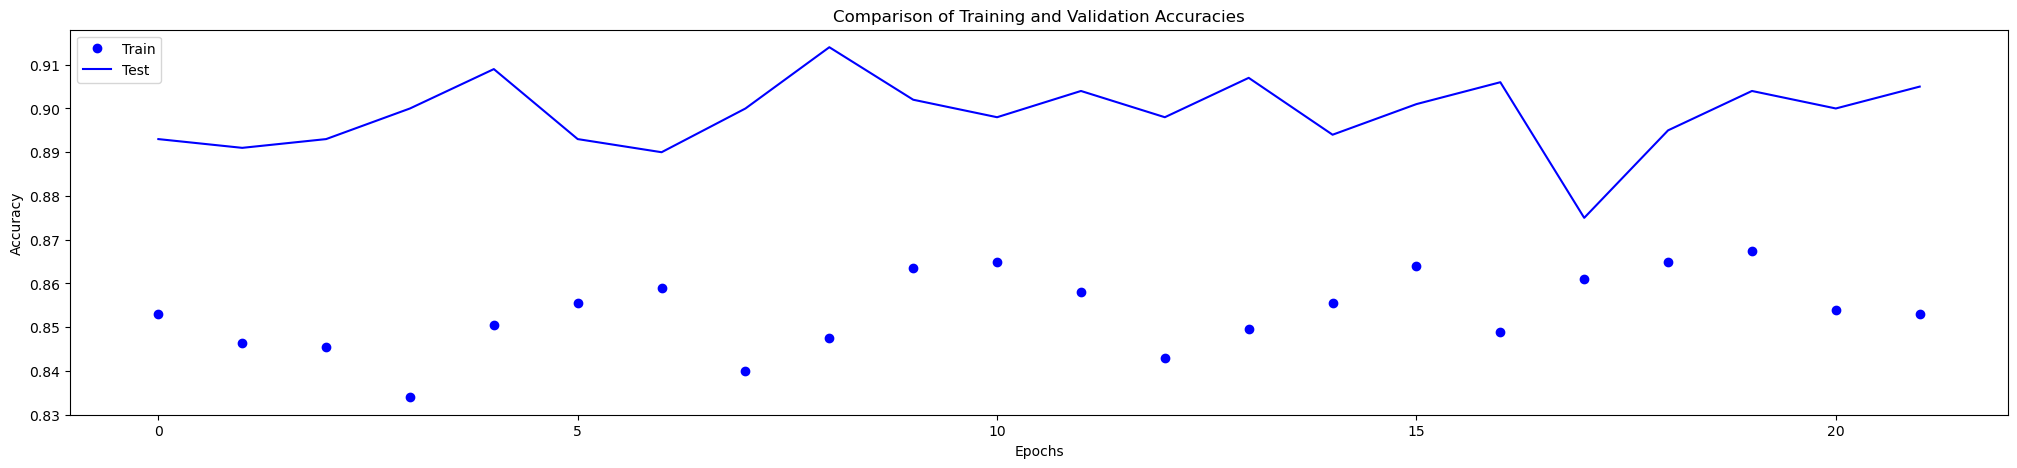

<Figure size 640x480 with 0 Axes>

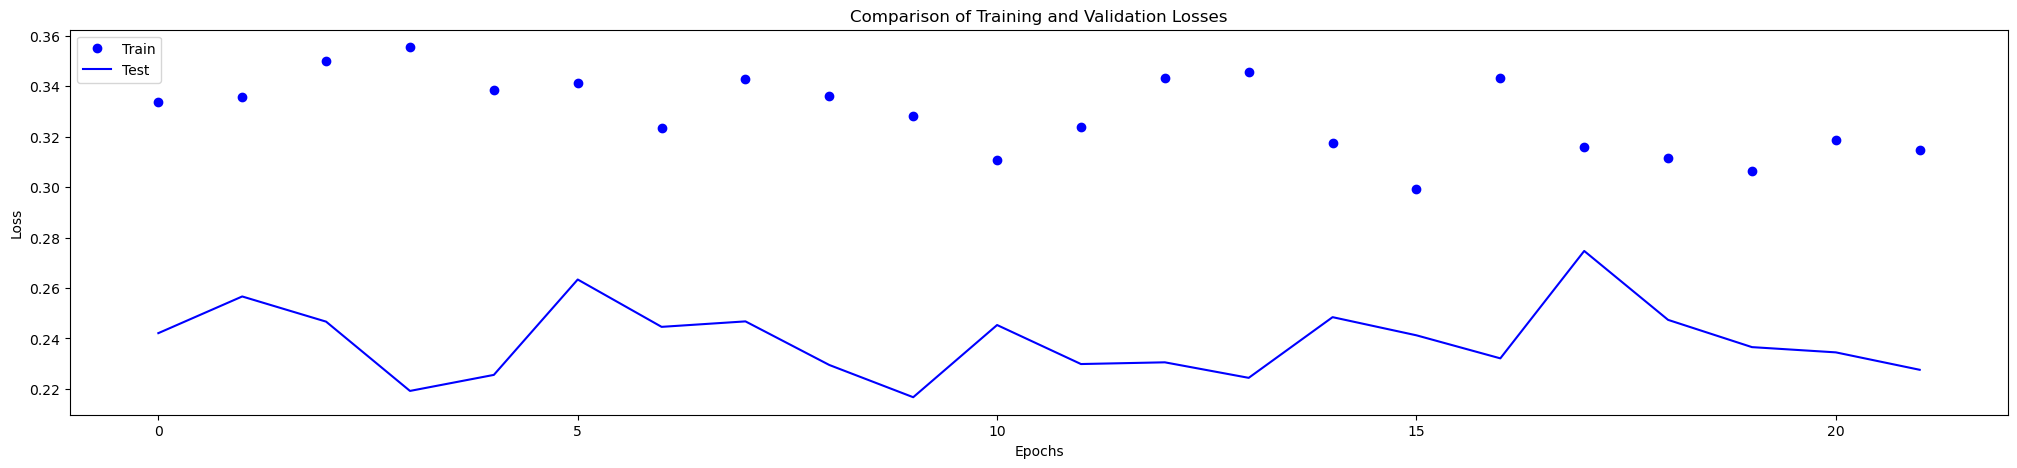

In [9]:
model3.save(models_dir + 'cats_and_dogs_small_3.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

PlotAccuracyComparison(acc, val_acc, lab = 'Model 1')
PlotLossComparison(loss, val_loss, lab = 'Model 1')

In [10]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [12]:
model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=25, restore_best_weights=True)

history2 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      callbacks=[early_stopping],
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 33s 317ms/step - loss: 0.3122 - acc: 0.8585 - val_loss: 0.2599 - val_acc: 0.9010
Epoch 2/100
100/100 [==============================] - 31s 314ms/step - loss: 0.2954 - acc: 0.8730 - val_loss: 0.2139 - val_acc: 0.9190
Epoch 3/100
100/100 [==============================] - 31s 313ms/step - loss: 0.2719 - acc: 0.8790 - val_loss: 0.2390 - val_acc: 0.9030
Epoch 4/100
100/100 [==============================] - 31s 309ms/step - loss: 0.2648 - acc: 0.8940 - val_loss: 0.1984 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 31s 312ms/step - loss: 0.2600 - acc: 0.8960 - val_loss: 0.1550 - val_acc: 0.9310
Epoch 6/100
100/100 [==============================] - 31s 314ms/step - loss: 0.2468 - acc: 0.8950 - val_loss: 0.1958 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 31s 314ms/step - loss: 0.2198 - acc: 0.9105 - val_loss: 0.1798 - val_acc: 0.9350
Epoch 8/100
100/100 [===========================

<Figure size 640x480 with 0 Axes>

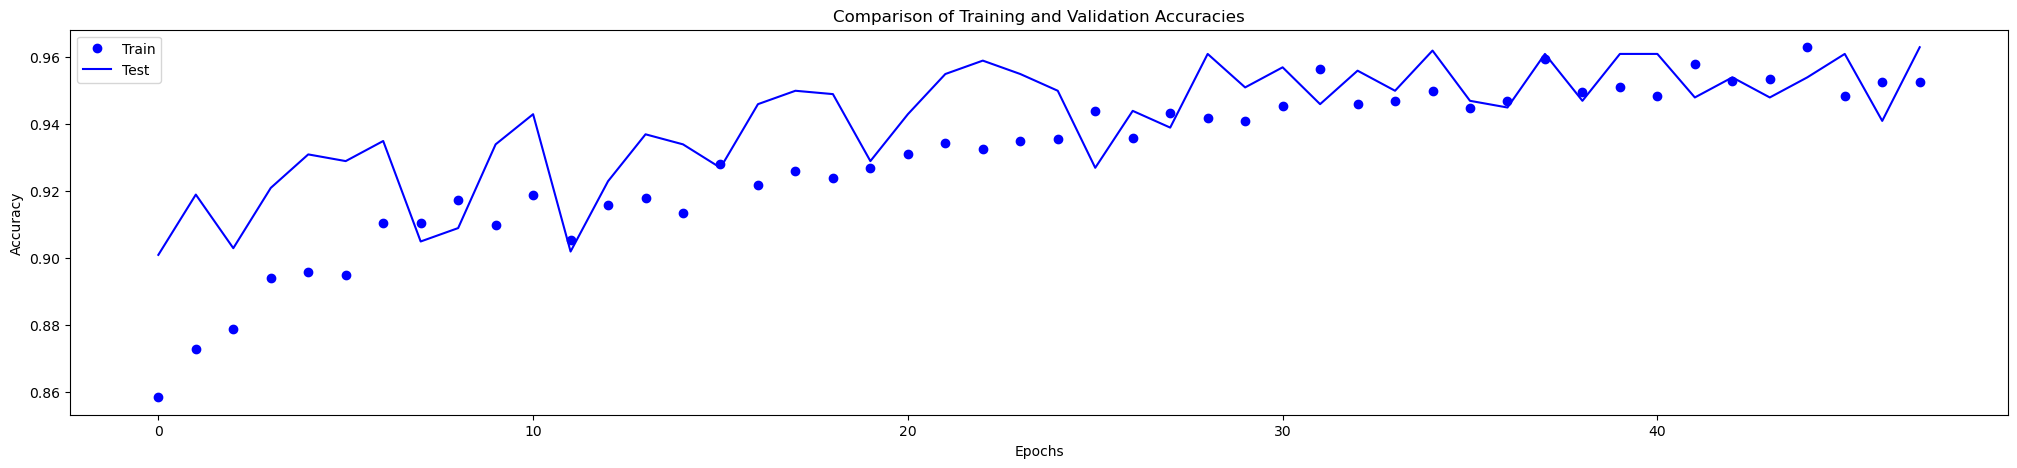

<Figure size 640x480 with 0 Axes>

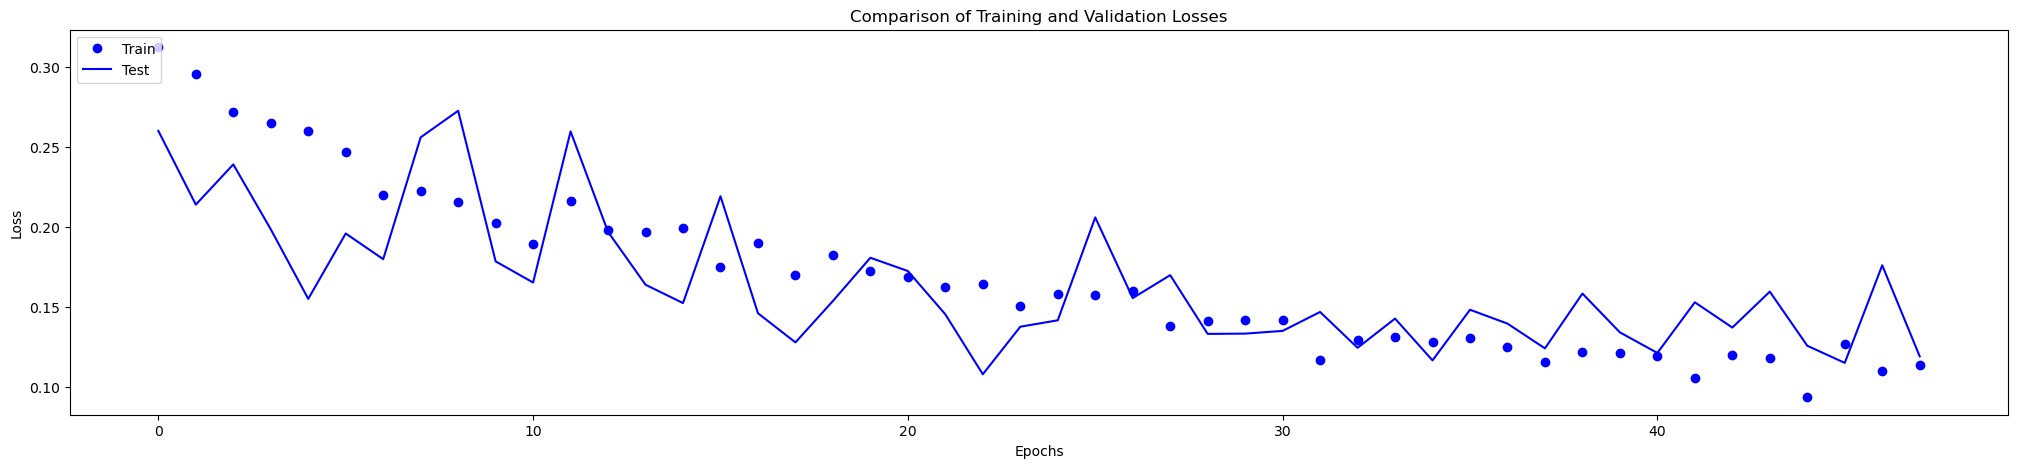

In [13]:
model3.save(models_dir + 'cats_and_dogs_small_3b.h5')
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2 - fined tuned the 5th conv-block')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2 - fined tuned the 5th conv-block')

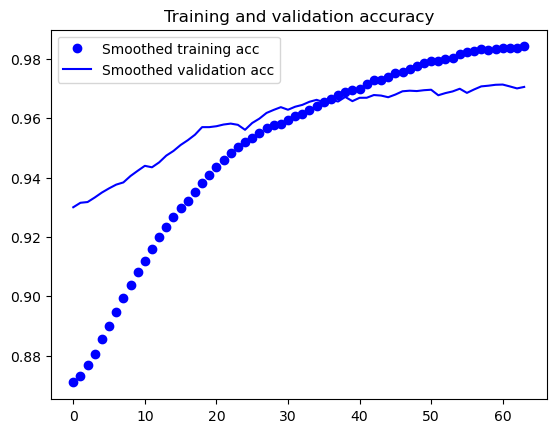

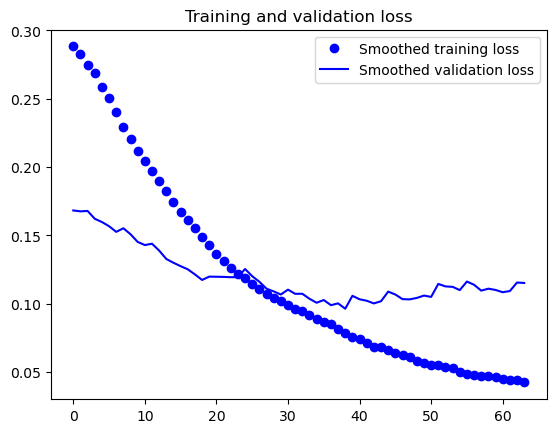

In [13]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#test_loss4, test_acc4 = model3.evaluate_generator(test_generator, steps=50)
test_loss4, test_acc4 = model3.evaluate(test_generator, steps=50)
print('test acc:', test_acc4)

Found 3000 images belonging to 2 classes.
50/50 [==============================] - 9s 168ms/step - loss: 0.1366 - acc: 0.9470
test acc: 0.9470000267028809


**Ostateczny wynik na danych testowych: 94,7%**

Odmrażamy kolejną warstwę:


In [18]:
conv_base.summary()

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [20]:
model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=25, restore_best_weights=True)

history2 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      callbacks=[early_stopping],
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 43s 418ms/step - loss: 0.1799 - acc: 0.9315 - val_loss: 0.1369 - val_acc: 0.9510
Epoch 2/100
100/100 [==============================] - 41s 409ms/step - loss: 0.1797 - acc: 0.9265 - val_loss: 0.1187 - val_acc: 0.9520
Epoch 3/100
100/100 [==============================] - 31s 307ms/step - loss: 0.1627 - acc: 0.9330 - val_loss: 0.1322 - val_acc: 0.9560
Epoch 4/100
100/100 [==============================] - 30s 297ms/step - loss: 0.1381 - acc: 0.9460 - val_loss: 0.1184 - val_acc: 0.9510
Epoch 5/100
100/100 [==============================] - 32s 321ms/step - loss: 0.1584 - acc: 0.9375 - val_loss: 0.1812 - val_acc: 0.9360
Epoch 6/100
100/100 [==============================] - 22s 221ms/step - loss: 0.1383 - acc: 0.9450 - val_loss: 0.1247 - val_acc: 0.9570
Epoch 7/100
100/100 [==============================] - 30s 296ms/step - loss: 0.1378 - acc: 0.9400 - val_loss: 0.1430 - val_acc: 0.9590
Epoch 8/100
100/100 [===========================

<Figure size 640x480 with 0 Axes>

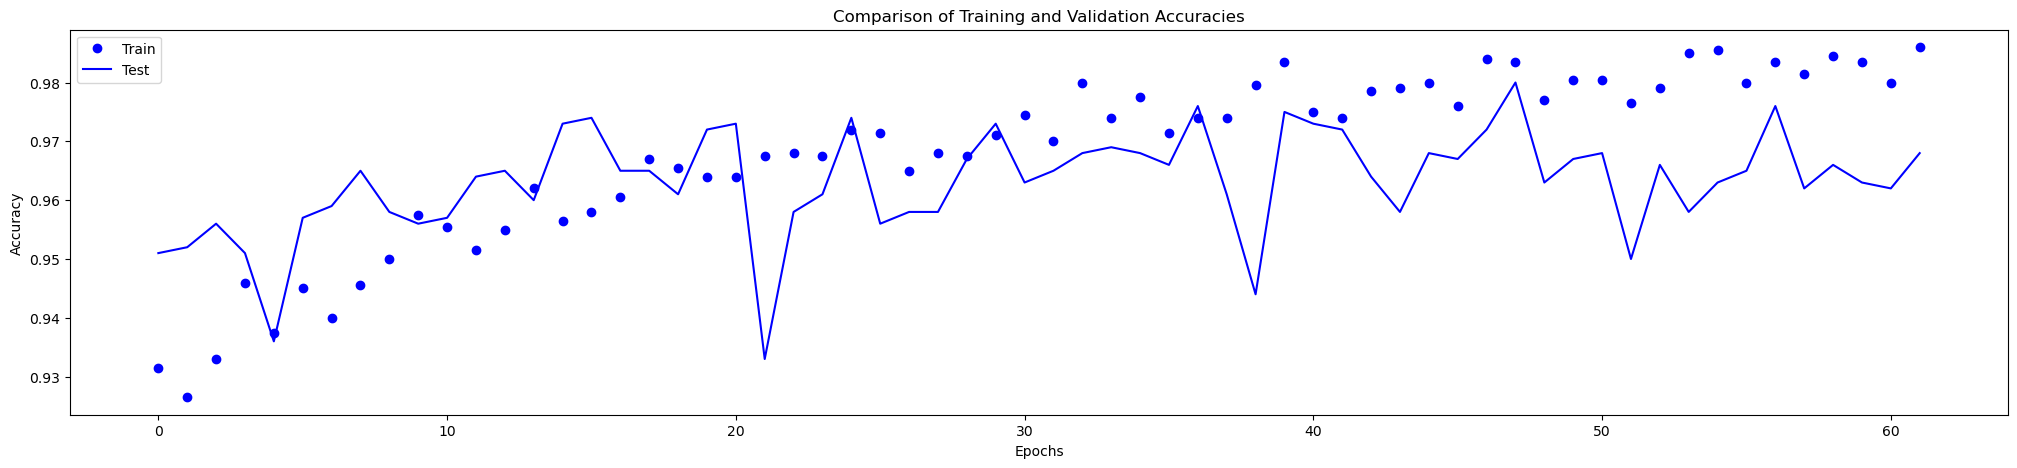

<Figure size 640x480 with 0 Axes>

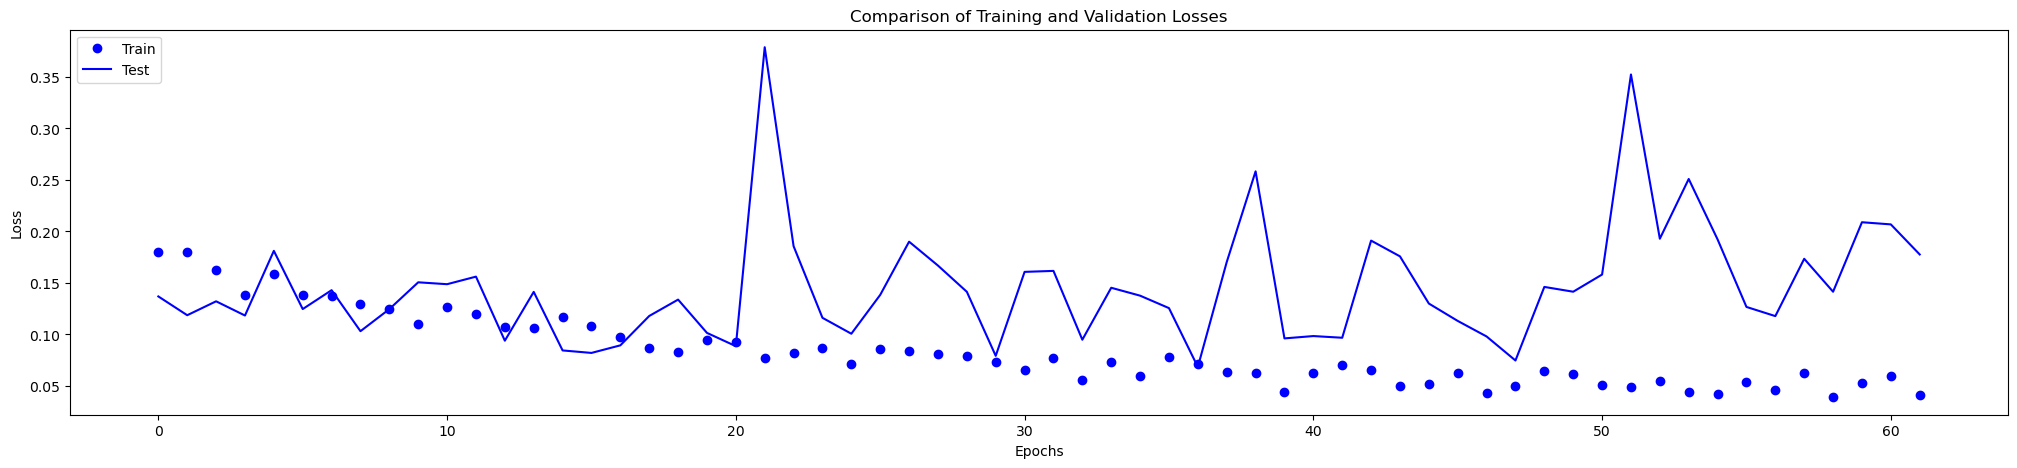

In [21]:
model3.save(models_dir + 'cats_and_dogs_small_3c.h5')
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 3 - fined tuned the 4th conv-block')
PlotLossComparison(loss2, val_loss2, lab = 'Model 3 - fined tuned the 4th conv-block')

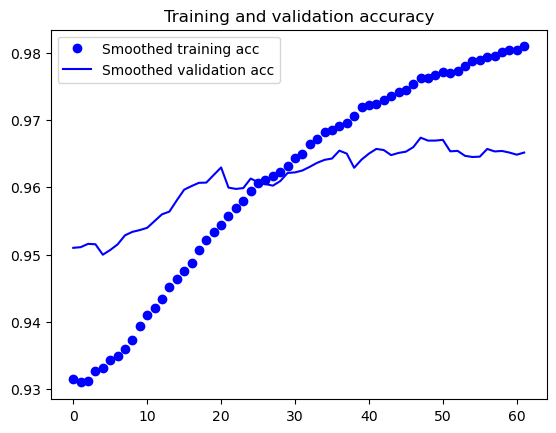

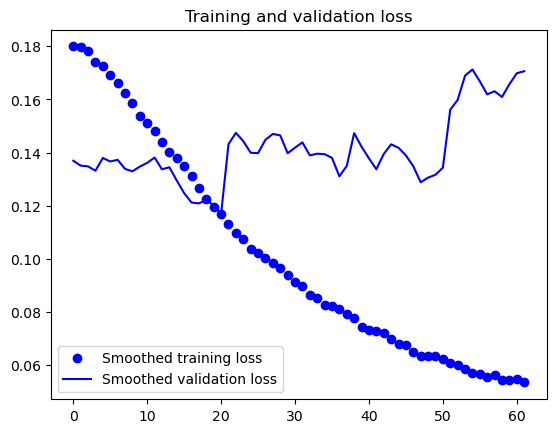

In [22]:
epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**MODEL DOŚĆ SZYBKO ZACZĄŁ SIĘ PRZEUCZAĆ I POGORSZYŁ LOSS, ZA TO ACCURACY OKAZAŁO SIĘ LEPSZE**
<!-- - wydaje się że lepiej zamrozić 4 warstwę, ponieważ model stał się zbyt zmienny -->
- na ten moment zostawię 4 warstwę do nauki ale:
- dodatkowo dodam regularyzacje, dropout i podmienię optimizer na adam
- jeżeli overfitting dalej będzie znaczny, zamroże warstwę 4


In [25]:
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-3)))
model3.add(layers.Dropout(0.3))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()
conv_base.trainable = False

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=2e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=12, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath=models_dir+'cats_and_dogs_small_4a.h5',
                                   monitor='val_loss',
                                   save_best_only=True)

history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[early_stopping, model_checkpoint])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 15,076,865
Non-trainable params: 1,735,488
_________________________________________________________________
Found 5000 images belonging to 2 c

In [26]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
model3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=25, restore_best_weights=True)

history2 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      callbacks=[early_stopping],
      validation_steps=50)

Epoch 1/100


c:\Users\krzys\miniconda3\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


100/100 [==============================] - 34s 328ms/step - loss: 0.2785 - acc: 0.9840 - val_loss: 0.3642 - val_acc: 0.9670
Epoch 2/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2936 - acc: 0.9760 - val_loss: 0.3389 - val_acc: 0.9710
Epoch 3/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2731 - acc: 0.9865 - val_loss: 0.4061 - val_acc: 0.9630
Epoch 4/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2858 - acc: 0.9825 - val_loss: 0.3262 - val_acc: 0.9720
Epoch 5/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2711 - acc: 0.9845 - val_loss: 0.3239 - val_acc: 0.9740
Epoch 6/100
100/100 [==============================] - 33s 325ms/step - loss: 0.2665 - acc: 0.9850 - val_loss: 0.3060 - val_acc: 0.9830
Epoch 7/100
100/100 [==============================] - 28s 275ms/step - loss: 0.2698 - acc: 0.9845 - val_loss: 0.3168 - val_acc: 0.9740
Epoch 8/100
100/100 [==============================] - 42s 4

<Figure size 640x480 with 0 Axes>

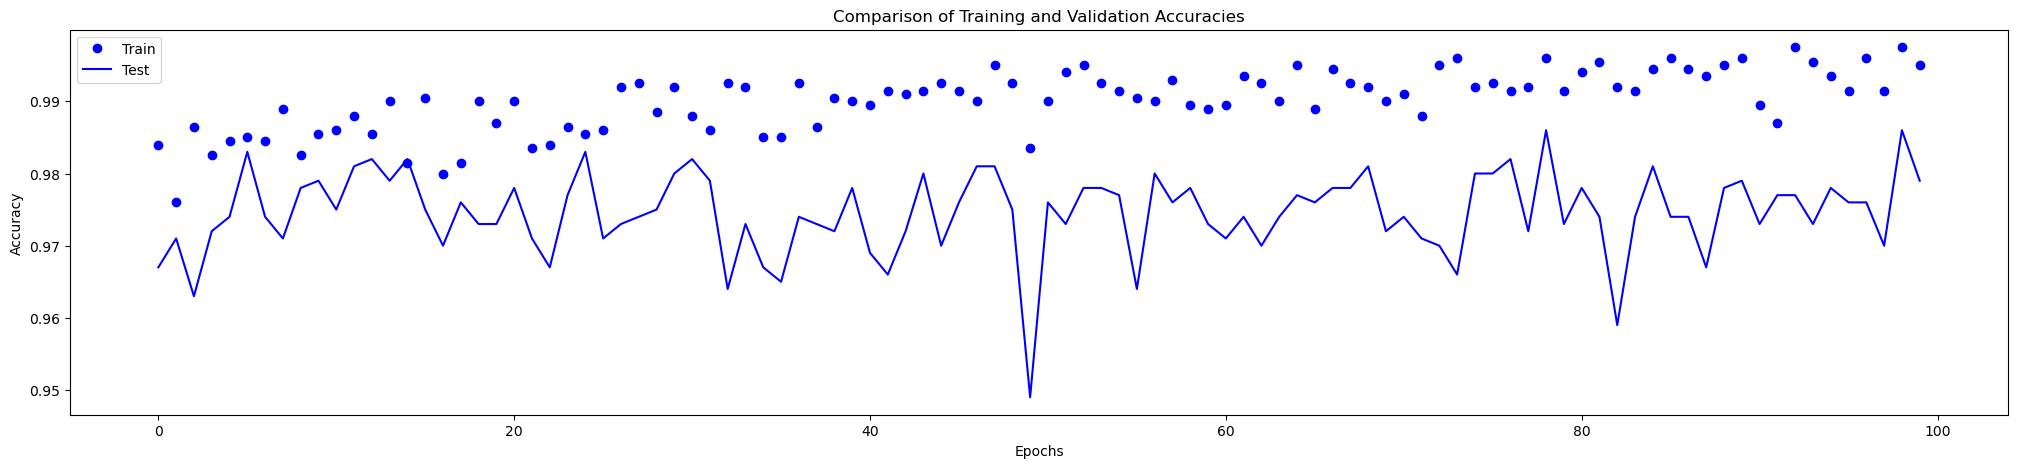

<Figure size 640x480 with 0 Axes>

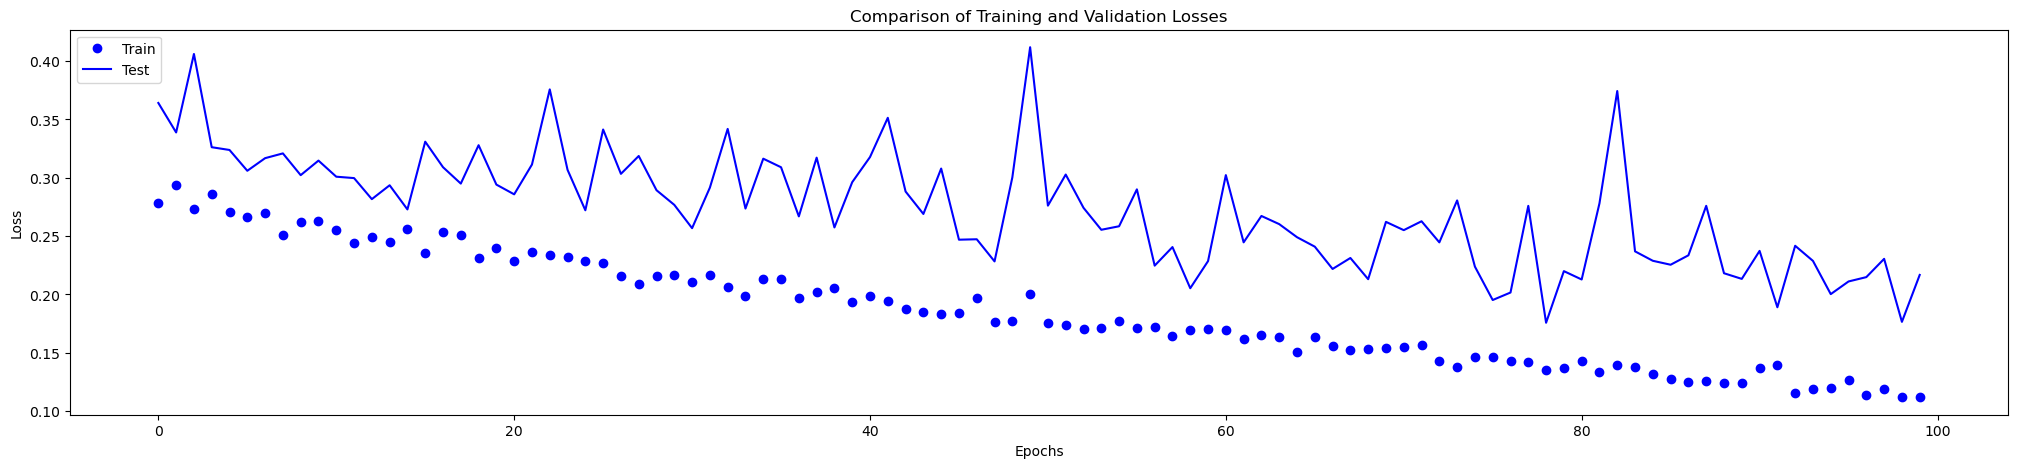

In [28]:
model3.save(models_dir + 'cats_and_dogs_small_4b.h5')
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 3 - fined tuned the 4th conv-block')
PlotLossComparison(loss2, val_loss2, lab = 'Model 3 - fined tuned the 4th conv-block')

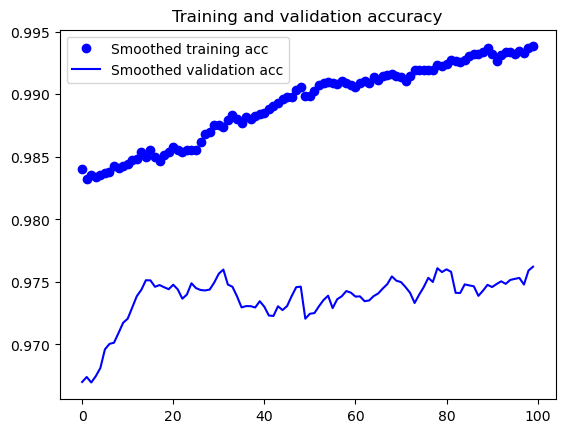

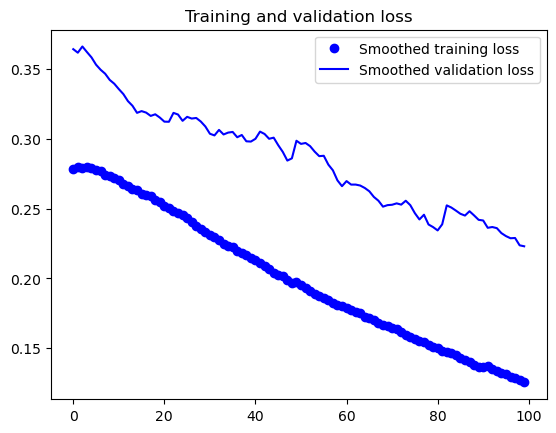

In [29]:
epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Regularyzacja  pomogła modelowi, ale i tak można zaobserwować przeuczenie**


## Kolejny etap

**Powtórzę cały proces, ale dla zwiększonej ilości danych treningowych**
- batch_size * 1,25
- steps_per_epoch * 2 czyli w sumie liczba danych * 2,5 (2000 -> 5000), nie udało mi sie pobrać więcej danych w tym zestawie

In [19]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()
conv_base.trainable = False

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=25,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=25,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=12, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath=models_dir+'cats_and_dogs_small_3a.h5',
                                   monitor='val_loss',
                                   save_best_only=True)

history = model3.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100,
      callbacks=[early_stopping, model_checkpoint])

Found 5000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
200/200 [==============================] - 71s 316ms/step - loss: 0.1751 - acc: 0.9592 - val_loss: 0.0780 - val_acc: 0.9696
Epoch 2/30
200/200 [==============================] - 60s 300ms/step - loss: 0.0680 - acc: 0.9800 - val_loss: 0.0752 - val_acc: 0.9684
Epoch 3/30
200/200 [==============================] - 54s 269ms/step - loss: 0.0539 - acc: 0.9800 - val_loss: 0.0697 - val_acc: 0.9724
Epoch 4/30
200/200 [==============================] - 55s 274ms/step - loss: 0.0455 - acc: 0.9852 - val_loss: 0.0777 - val_acc: 0.9724
Epoch 5/30
200/200 [==============================] - 55s 274ms/step - loss: 0.0406 - acc: 0.9862 - val_loss: 0.0771 - val_acc: 0.9724
Epoch 6/30
200/200 [==============================] - 55s 277ms/step - loss: 0.0450 - acc: 0.9844 - val_loss: 0.0892 - val_acc: 0.9696
Epoch 7/30
200/200 [==============================] - 58s 288ms/step - loss: 0.0424 - acc: 0.9842 - val_lo

In [22]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model3.compile(loss='binary_crossentropy',
        optimizer=RMSprop(lr=1e-5),
        metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=25, restore_best_weights=True)

history2 = model3.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      callbacks=[early_stopping],
      validation_steps=100)

Epoch 1/100
200/200 [==============================] - 102s 505ms/step - loss: 0.0612 - acc: 0.9774 - val_loss: 0.1304 - val_acc: 0.9652
Epoch 2/100
200/200 [==============================] - 101s 505ms/step - loss: 0.0621 - acc: 0.9774 - val_loss: 0.1796 - val_acc: 0.9584
Epoch 3/100
200/200 [==============================] - 85s 424ms/step - loss: 0.0585 - acc: 0.9770 - val_loss: 0.0787 - val_acc: 0.9780
Epoch 4/100
200/200 [==============================] - 81s 404ms/step - loss: 0.0522 - acc: 0.9808 - val_loss: 0.0932 - val_acc: 0.9748
Epoch 5/100
200/200 [==============================] - 91s 454ms/step - loss: 0.0558 - acc: 0.9792 - val_loss: 0.0777 - val_acc: 0.9760
Epoch 6/100
200/200 [==============================] - 94s 468ms/step - loss: 0.0461 - acc: 0.9830 - val_loss: 0.0764 - val_acc: 0.9756
Epoch 7/100
200/200 [==============================] - 94s 469ms/step - loss: 0.0432 - acc: 0.9860 - val_loss: 0.1277 - val_acc: 0.9692
Epoch 8/100
200/200 [=========================

<Figure size 640x480 with 0 Axes>

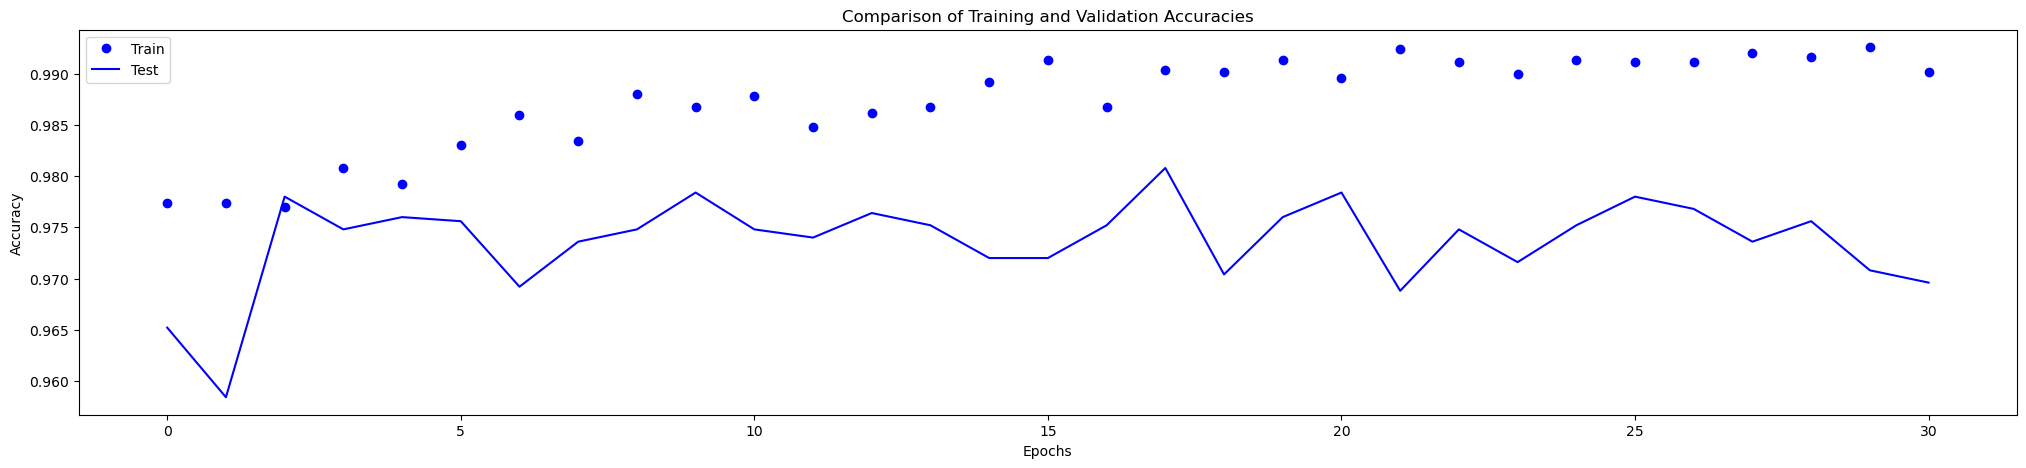

<Figure size 640x480 with 0 Axes>

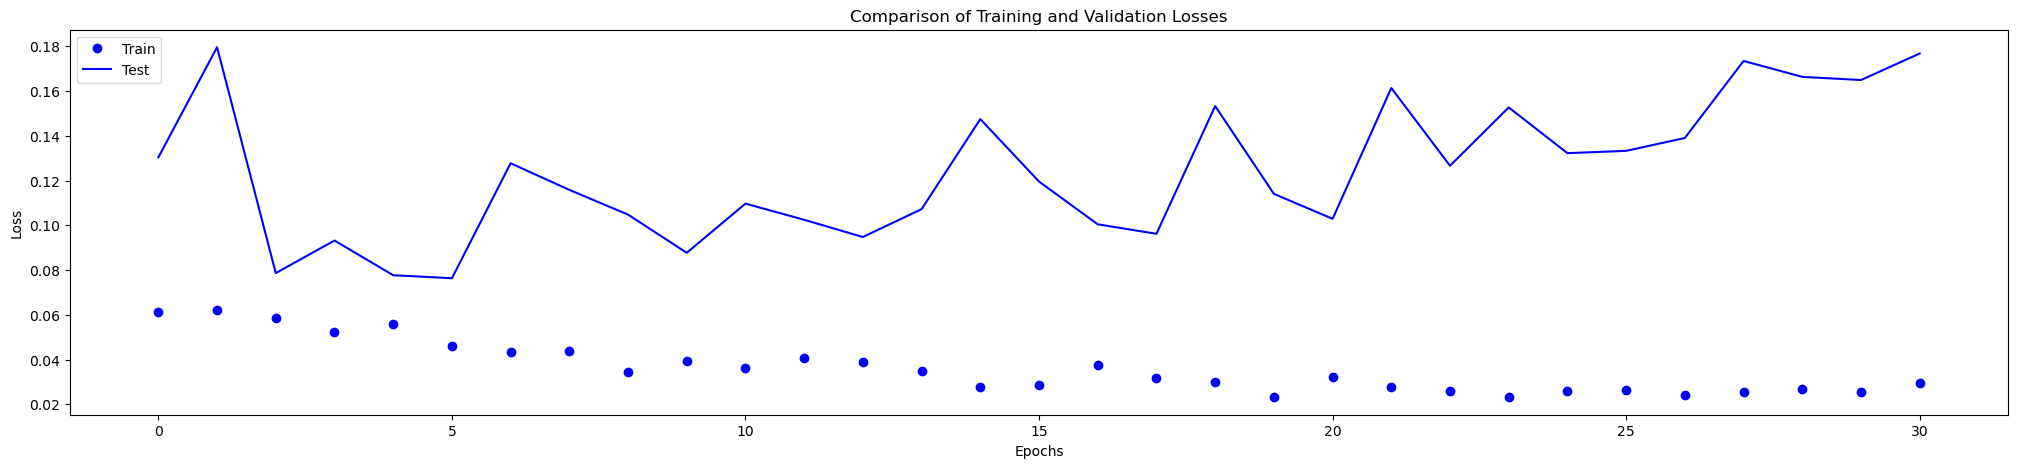

In [23]:
model3.save(models_dir + 'cats_and_dogs_small_5b.h5')
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 3 - fined tuned the 4th conv-block')
PlotLossComparison(loss2, val_loss2, lab = 'Model 3 - fined tuned the 4th conv-block')

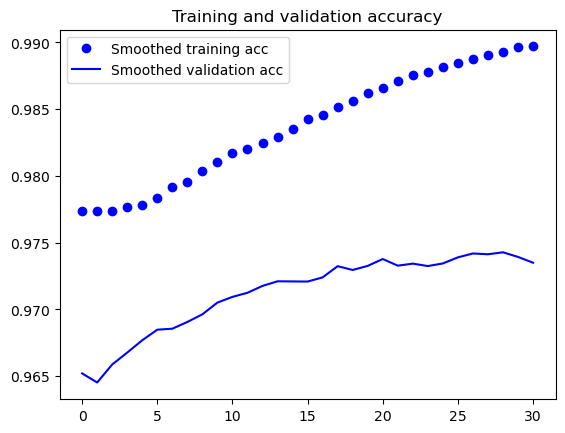

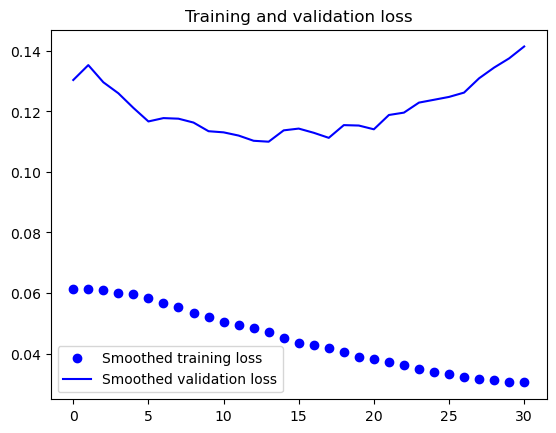

In [24]:
epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Zwiększenie danych treningowych polepszyło dokładność modelu, ale znacznie lepiej zadziałało na dokładność treningową co teoretycznie oznacza przeuczenie ale wynik walidacyjny i tak jest lepszy**

## Zbiór danych CIFAR

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from keras import Sequential

from keras.applications import VGG19

from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

from keras.utils import to_categorical


In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_val=x_train[35000:]
y_val=y_train[35000:]
x_train=x_train[:35000]
y_train=y_train[:35000]

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [4]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

In [5]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))


In [6]:
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_generator = ImageDataGenerator(
        rescale=1./255)

train_generator.fit(x_train)
val_generator.fit(x_val)

In [7]:
models_dir = 'C:/Users/krzys/Desktop/GGSN/ml/models/'

lrr= ReduceLROnPlateau(
                       monitor='val_acc', 
                       factor=.01, 
                       patience=3,  
                       min_lr=1e-5)

model_checkpoint = ModelCheckpoint(filepath=models_dir+'cifar_transfer_1a.h5',
                                   monitor='val_acc',
                                   save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10, restore_best_weights=True)


conv_base = VGG19(include_top=False,
                  weights='imagenet',
                  input_shape=(32,32,3),
                  classes=y_train.shape[1])

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024, activation='relu', input_dim=512))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

conv_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                        

In [32]:
batch_size= 100
epochs=30

adam = Adam(lr=.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [33]:
history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]//batch_size,
                    callbacks=[lrr, model_checkpoint, early_stopping])

Epoch 1/30


C:\Users\krzys\AppData\Local\Temp\ipykernel_6520\3957950867.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),


350/350 [==============================] - 39s 107ms/step - loss: 1.9177 - acc: 0.3273 - val_loss: 1.7035 - val_acc: 0.3753 - lr: 0.0010
Epoch 2/30
350/350 [==============================] - 37s 107ms/step - loss: 1.6873 - acc: 0.3998 - val_loss: 1.5494 - val_acc: 0.4524 - lr: 0.0010
Epoch 3/30
350/350 [==============================] - 37s 106ms/step - loss: 1.6172 - acc: 0.4291 - val_loss: 1.4299 - val_acc: 0.4839 - lr: 0.0010
Epoch 4/30
350/350 [==============================] - 37s 105ms/step - loss: 1.5859 - acc: 0.4411 - val_loss: 1.4589 - val_acc: 0.4837 - lr: 0.0010
Epoch 5/30
350/350 [==============================] - 37s 105ms/step - loss: 1.5568 - acc: 0.4493 - val_loss: 1.4172 - val_acc: 0.4999 - lr: 0.0010
Epoch 6/30
350/350 [==============================] - 37s 105ms/step - loss: 1.5385 - acc: 0.4535 - val_loss: 1.4575 - val_acc: 0.4861 - lr: 0.0010
Epoch 7/30
350/350 [==============================] - 37s 106ms/step - loss: 1.5333 - acc: 0.4588 - val_loss: 1.3655 - val_

Model ciągle się uczy odpale kolejne 30 epok

In [11]:
import keras
batch_size= 100
epochs=30

model.load_weights(models_dir+'cifar_transfer_1a.h5')

adam = Adam(lr=.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

c:\Users\krzys\miniconda3\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]//batch_size,
                    callbacks=[lrr, model_checkpoint, early_stopping])

C:\Users\krzys\AppData\Local\Temp\ipykernel_6132\3957950867.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/30
350/350 [==============================] - 44s 108ms/step - loss: 1.4273 - acc: 0.4979 - val_loss: 1.3001 - val_acc: 0.5366 - lr: 0.0010
Epoch 2/30
350/350 [==============================] - 36s 103ms/step - loss: 1.4250 - acc: 0.4993 - val_loss: 1.2890 - val_acc: 0.5465 - lr: 0.0010
Epoch 3/30
350/350 [==============================] - 36s 104ms/step - loss: 1.4207 - acc: 0.4967 - val_loss: 1.2695 - val_acc: 0.5523 - lr: 0.0010
Epoch 4/30
350/350 [==============================] - 39s 111ms/step - loss: 1.4123 - acc: 0.5036 - val_loss: 1.2728 - val_acc: 0.5471 - lr: 0.0010
Epoch 5/30
350/350 [==============================] - 36s 104ms/step - loss: 1.4106 - acc: 0.5029 - val_loss: 1.2809 - val_acc: 0.5425 - lr: 0.0010
Epoch 6/30
350/350 [==============================] - 38s 109ms/step - loss: 1.4051 - acc: 0.5063 - val_loss: 1.3006 - val_acc: 0.5407 - lr: 0.0010
Epoch 7/30
350/350 [==============================] - 40s 115ms/step - loss: 1.3887 - acc: 0.5140 - val_loss: 1.

<Figure size 640x480 with 0 Axes>

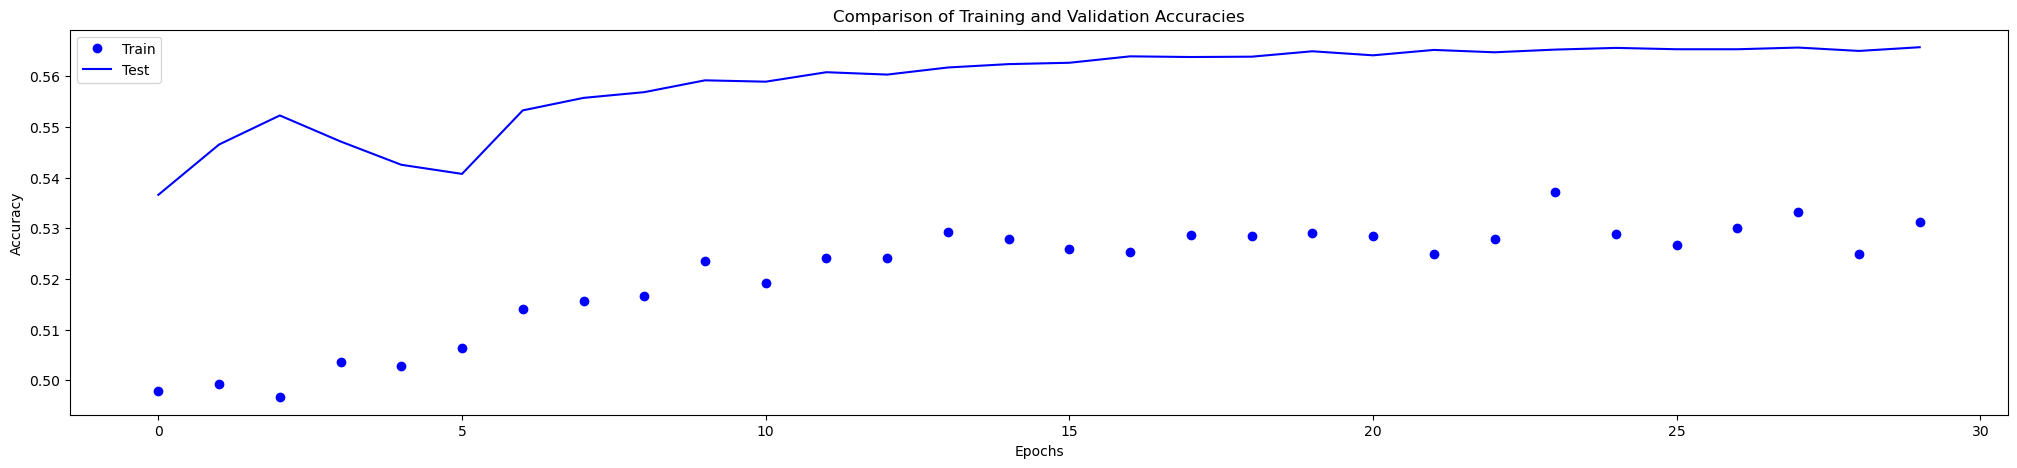

<Figure size 640x480 with 0 Axes>

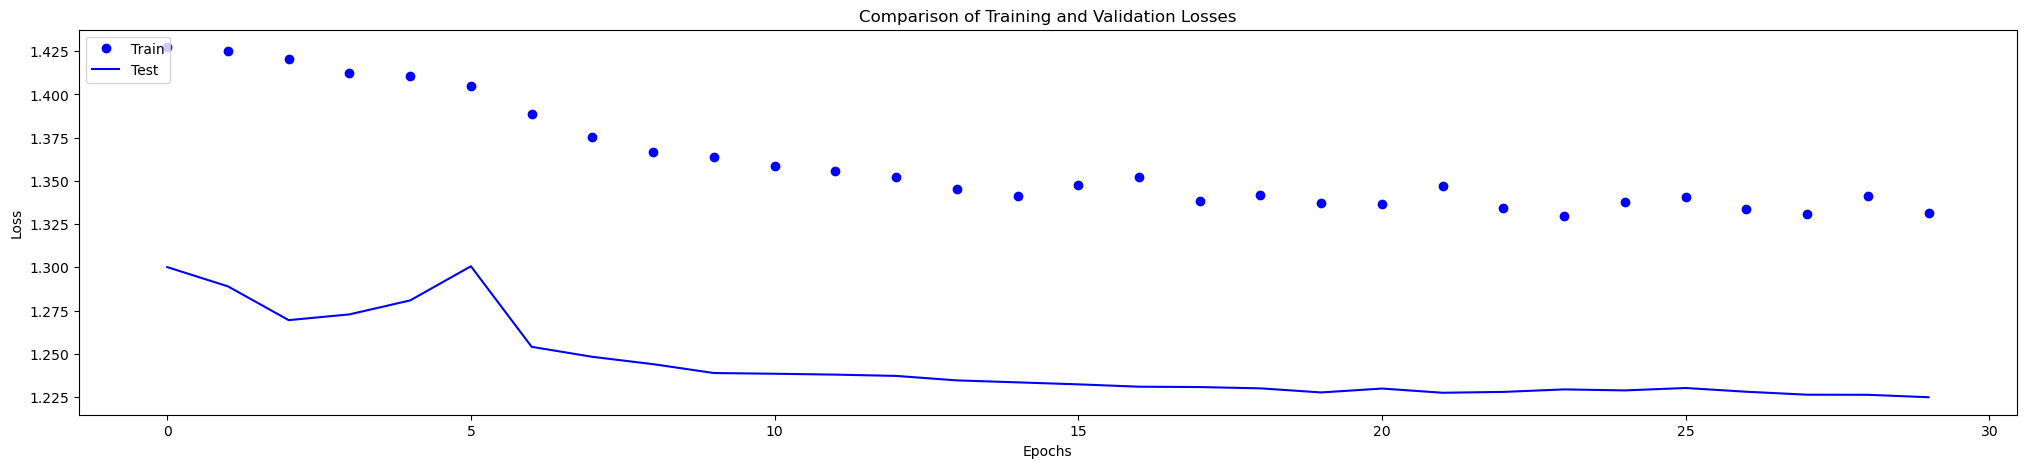

In [16]:
model.save(models_dir+'cifar_transfer_1b.h5')
import matplotlib.pyplot as plt

acc2 = history.history['acc']
val_acc2 = history.history['val_acc']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'cifar')
PlotLossComparison(loss2, val_loss2, lab = 'cifar')

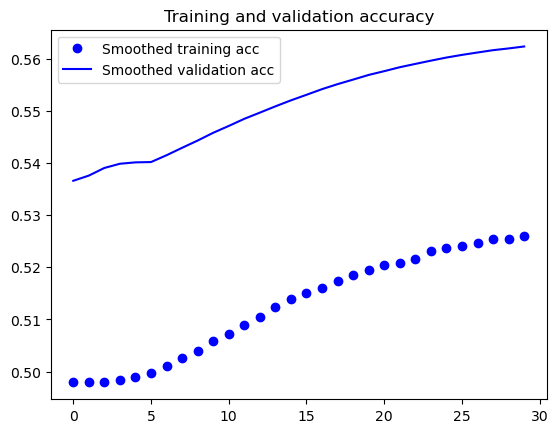

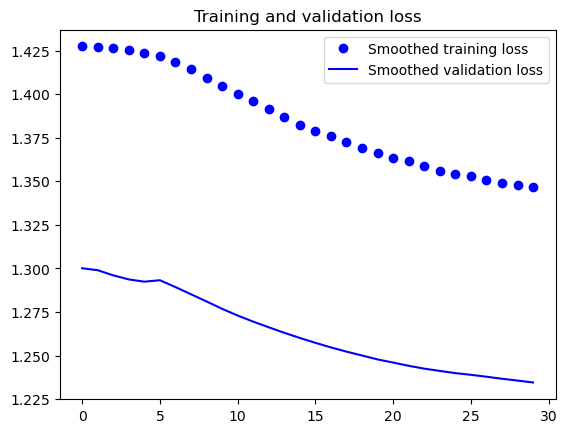

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.load_weights(models_dir+'cifar_transfer_1a.h5')
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [15]:
batch_size= 100
epochs=30

adam = Adam(lr=.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

c:\Users\krzys\miniconda3\envs\gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]//batch_size,
                    callbacks=[lrr, model_checkpoint, early_stopping])

C:\Users\krzys\AppData\Local\Temp\ipykernel_18912\3957950867.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/30
350/350 [==============================] - 56s 140ms/step - loss: 1.9016 - acc: 0.2761 - val_loss: 4.7467 - val_acc: 0.1011 - lr: 0.0010
Epoch 2/30
350/350 [==============================] - 48s 137ms/step - loss: 1.5931 - acc: 0.4014 - val_loss: 1.5296 - val_acc: 0.4445 - lr: 0.0010
Epoch 3/30
350/350 [==============================] - 49s 139ms/step - loss: 1.4770 - acc: 0.4521 - val_loss: 1.3402 - val_acc: 0.4933 - lr: 0.0010
Epoch 4/30
350/350 [==============================] - 48s 137ms/step - loss: 1.5679 - acc: 0.4211 - val_loss: 4.5143 - val_acc: 0.1223 - lr: 0.0010
Epoch 5/30
350/350 [==============================] - 47s 134ms/step - loss: 1.4916 - acc: 0.4519 - val_loss: 1.5328 - val_acc: 0.4558 - lr: 0.0010
Epoch 6/30
350/350 [==============================] - 48s 137ms/step - loss: 1.3813 - acc: 0.4981 - val_loss: 1.4691 - val_acc: 0.4759 - lr: 0.0010
Epoch 7/30
350/350 [==============================] - 48s 138ms/step - loss: 1.3451 - acc: 0.5145 - val_loss: 1.

In [17]:
conv_base.trainable = True

batch_size= 100
epochs=100

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=15, restore_best_weights=True)

adam = Adam(lr=.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [18]:
history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]//batch_size,
                    callbacks=[lrr, model_checkpoint, early_stopping])

Epoch 1/100


C:\Users\krzys\AppData\Local\Temp\ipykernel_18912\3957950867.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size),


350/350 [==============================] - 100s 277ms/step - loss: 2.0199 - acc: 0.2110 - val_loss: 2.7669 - val_acc: 0.1870 - lr: 0.0010
Epoch 2/100
350/350 [==============================] - 94s 268ms/step - loss: 1.8147 - acc: 0.2823 - val_loss: 1.6257 - val_acc: 0.3383 - lr: 0.0010
Epoch 3/100
350/350 [==============================] - 94s 269ms/step - loss: 1.6557 - acc: 0.3443 - val_loss: 1.5817 - val_acc: 0.3829 - lr: 0.0010
Epoch 4/100
350/350 [==============================] - 94s 268ms/step - loss: 1.5709 - acc: 0.3898 - val_loss: 1.6713 - val_acc: 0.3995 - lr: 0.0010
Epoch 5/100
350/350 [==============================] - 95s 272ms/step - loss: 1.4951 - acc: 0.4283 - val_loss: 1.9937 - val_acc: 0.3387 - lr: 0.0010
Epoch 6/100
350/350 [==============================] - 94s 268ms/step - loss: 1.4363 - acc: 0.4596 - val_loss: 1.5037 - val_acc: 0.4524 - lr: 0.0010
Epoch 7/100
350/350 [==============================] - 94s 269ms/step - loss: 1.3770 - acc: 0.4961 - val_loss: 1.4477

<Figure size 640x480 with 0 Axes>

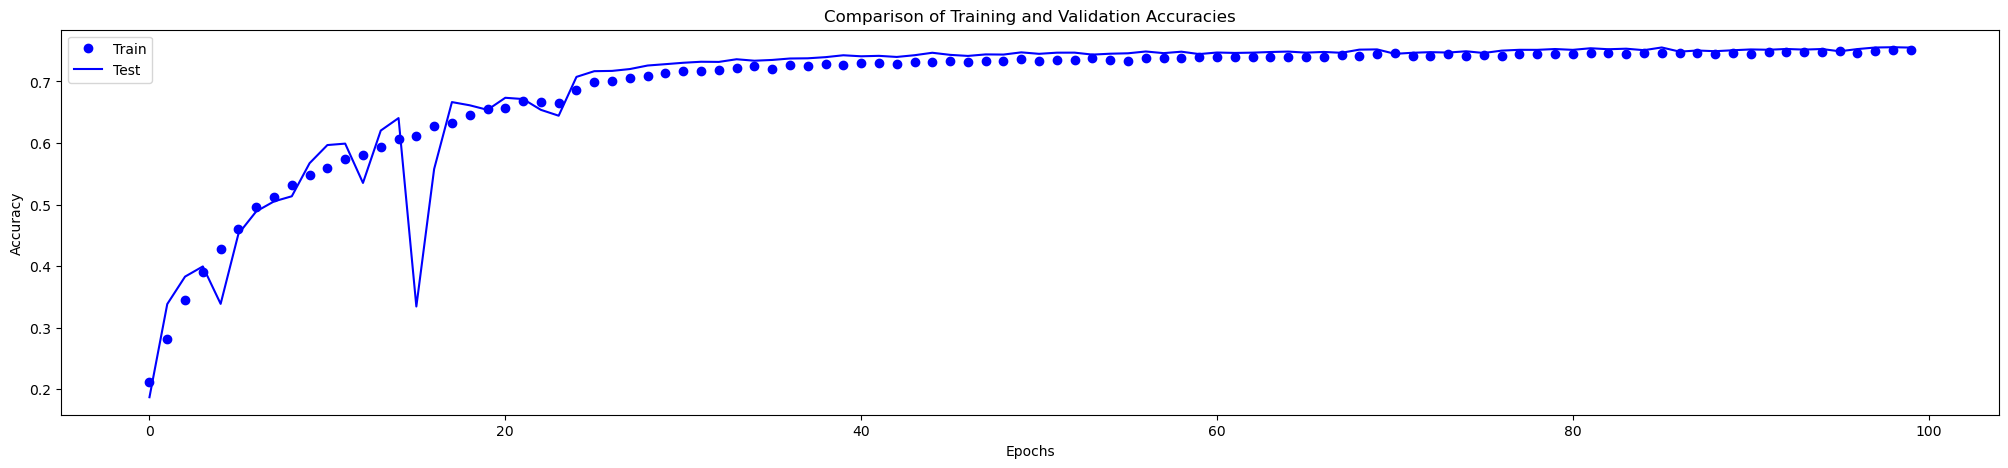

<Figure size 640x480 with 0 Axes>

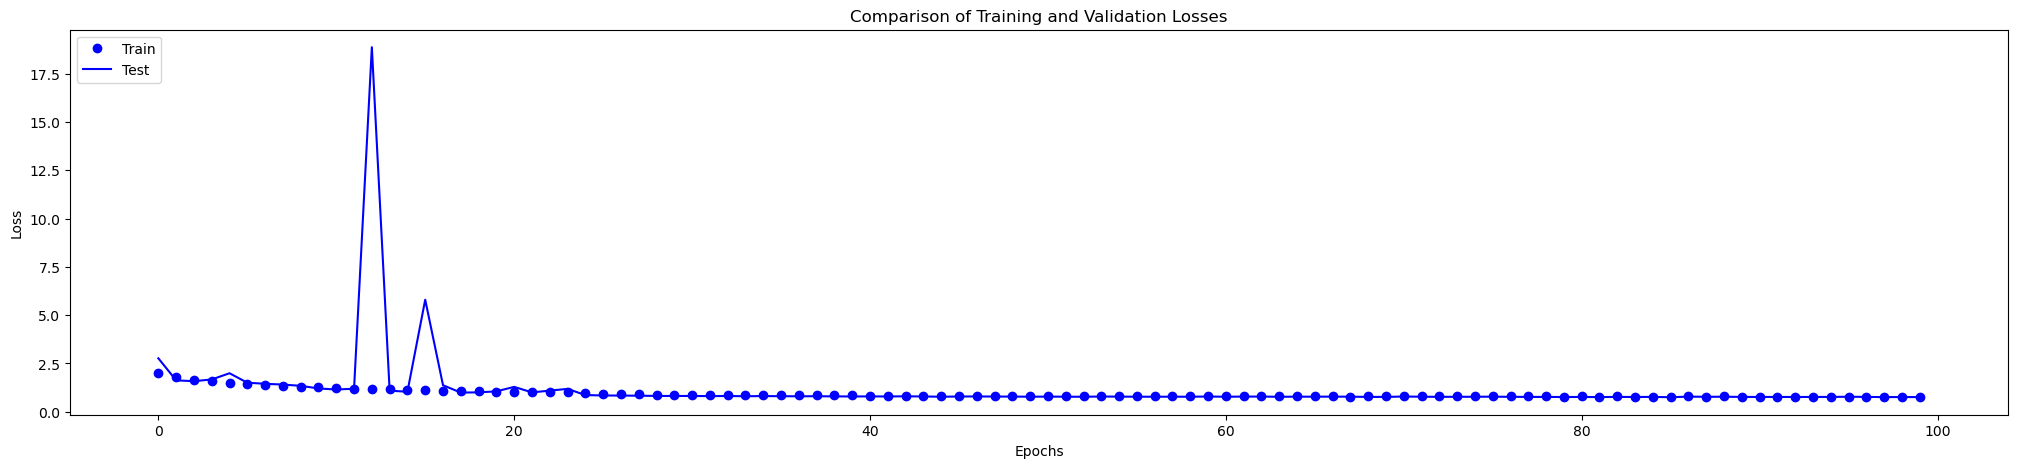

In [20]:
model.save(models_dir+'cifar_transfer_1c.h5')
import matplotlib.pyplot as plt

acc2 = history.history['acc']
val_acc2 = history.history['val_acc']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'cifar')
PlotLossComparison(loss2, val_loss2, lab = 'cifar')

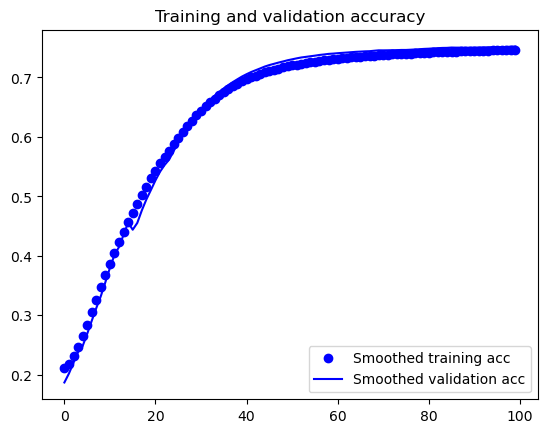

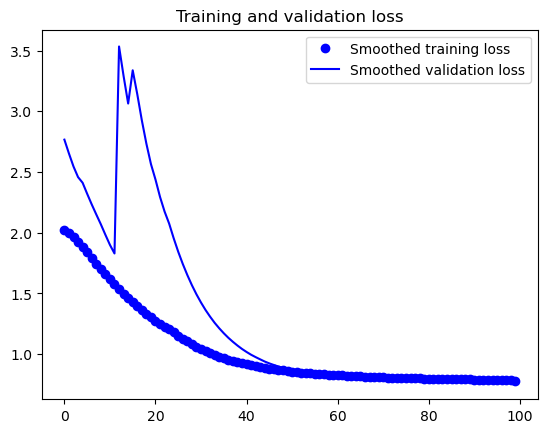

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs = range(len(acc2))

plt.plot(epochs, smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Ostatecznie model wyuczył się na 75% accuracy